# Power Spectrum 

* [1.3.2.c Interpreting a DFT plot](https://www.coursera.org/learn/dsp1/lecture/Mrwua?t=107)

> The square magnitude of the k-th DFT coefficient gives an indication of the energy associated to the frequency (2π/N)*k that composes a signal. The signal's energy at a given frequency is proportional to the magnitude of the DFT coefficient at that point.

> <img src="image/parseval_theorem.png" align="left" width=600/>

In [1]:
from typing import (
    Callable
)
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.fft import (
    rfft, 
    rfftfreq
)
import torch

from IPython.display import (
    Audio, 
    display
)

# Constant

In [2]:
FREQUENCY: float = 128
SAMPLING_RATE: int = 8000
DURATION: float = 3

# Function

In [3]:
def f(x):
    return np.sin(FREQUENCY * 2 * np.pi * x)

In [4]:
def f_amplitude(x):
    return np.abs(f(x))

In [5]:
def generate_samples(sampling_rate: float, seconds: float, func: Callable):
    x = np.linspace(0, seconds, int(sampling_rate * seconds), endpoint=False)
    return x, func(x)

In [6]:
x, y = generate_samples(sampling_rate=SAMPLING_RATE, seconds=DURATION, func=f)

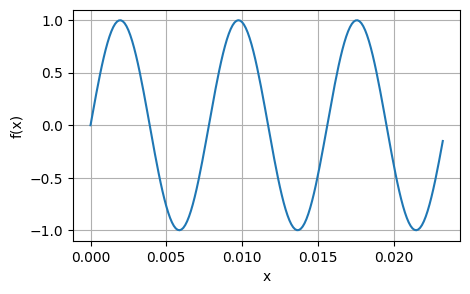

In [7]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], y[:int(len(x) / FREQUENCY)])
plt.show()

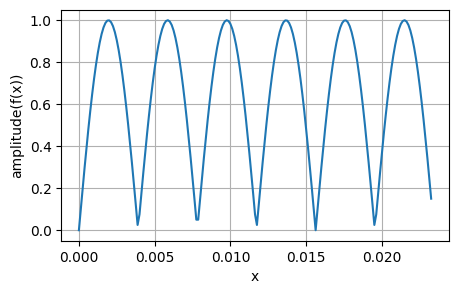

In [8]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('amplitude(f(x))')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], f_amplitude(x)[:int(len(x) / FREQUENCY)])
# plt.plot(x, f_amplitude(x))
plt.show()

# FFT

In [9]:
N = len(x)
assert N == int(SAMPLING_RATE * DURATION)

# Frequencies
xf = rfftfreq(
    n=N,             # window length
    d=(1/SAMPLING_RATE)    # delta(t) = sample spacing.
)

# Manitude
yf = np.abs(rfft(x=y, n=len(x))) / N

# Amplitude
a = 2 * yf

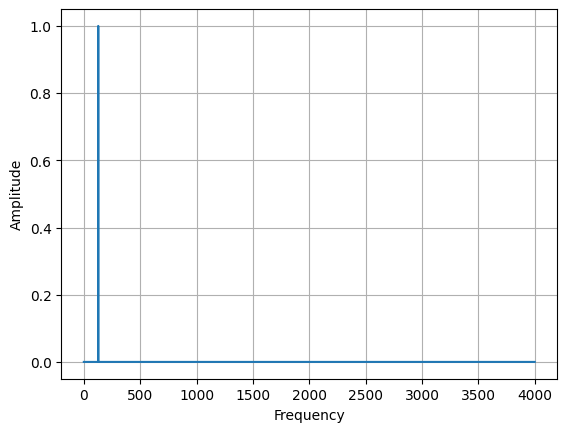

In [10]:
plt.plot(xf, a)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Power

$
P = A^2 / 2
$

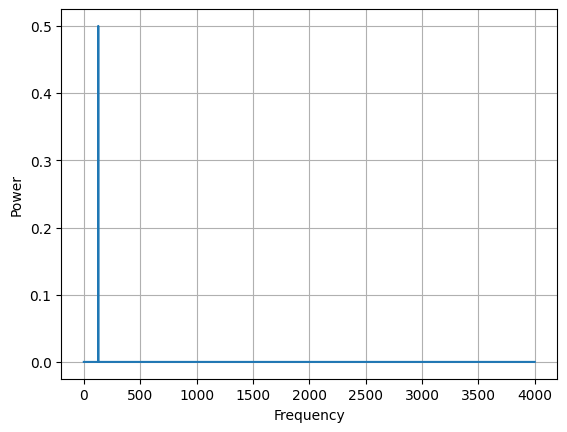

In [11]:
p = np.power(a, 2) / 2
plt.plot(xf, p)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.show()

# Amplitude, Power, PSD

In [13]:
def plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(5,2))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

exepected amplitude 2.8284271247461903, actual amplitude 2.8328619378579045


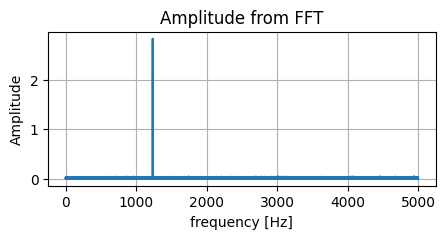

power is 4.012553379482021


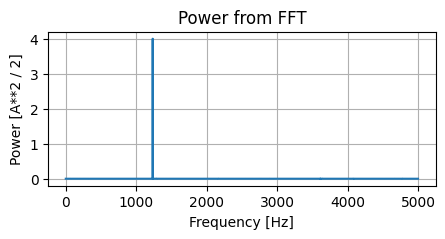

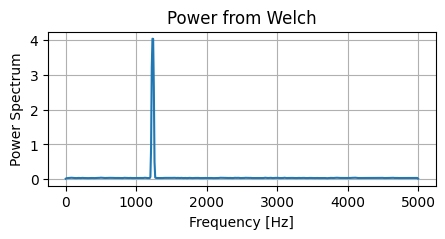

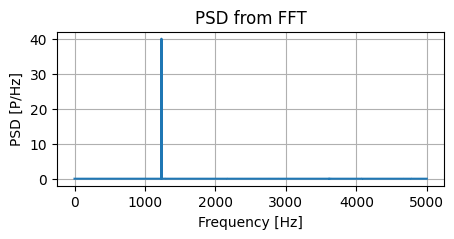

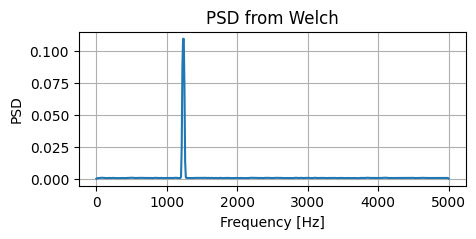

In [14]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
 
# --------------------------------------------------------------------------------
# Sampling (duration 10 secs)
# --------------------------------------------------------------------------------
FS = 1e4      # Sampling Rate
N = 1e5       # Total sample points
time = np.arange(N) / FS

# --------------------------------------------------------------------------------
# Target wave A * sin(2pi * F)
# --------------------------------------------------------------------------------
A = 2*np.sqrt(2)    # Amplitude
F = 1234.0          # Frequency
x = A * np.sin(2*np.pi * F * time)

# Noise
noise_power = 0.001 * FS / 2
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# --------------------------------------------------------------------------------
# FFT
# --------------------------------------------------------------------------------
freqs = np.fft.rfftfreq(time.size, 1/FS)
idx = np.argsort(freqs)
yf = np.abs(np.fft.rfft(x))

amplitude = 2 * yf / N
print(f"exepected amplitude {A}, actual amplitude {amplitude[np.argmax(amplitude)]}")
plot(freqs[idx], amplitude[idx], xlabel='frequency [Hz]', ylabel='Amplitude', title="Amplitude from FFT")

# --------------------------------------------------------------------------------
# Power Spectrum P = A**2 / 2
# --------------------------------------------------------------------------------
power = amplitude ** 2 / 2
print(f"power is {power[np.argmax(power)]}")
plot(freqs[idx], power[idx], xlabel='Frequency [Hz]', ylabel='Power [A**2 / 2]', title="Power from FFT")

# --------------------------------------------------------------------------------
# Power Spectram from Welch
# --------------------------------------------------------------------------------
f, welch_P = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plot(f, welch_P, xlabel='Frequency [Hz]', ylabel='Power Spectrum', title="Power from Welch")

# --------------------------------------------------------------------------------
# PSD = P * (1/FS)
# --------------------------------------------------------------------------------
psd = power * (N/FS)
plot(freqs[idx], psd[idx], xlabel='Frequency [Hz]', ylabel='PSD [P/Hz]', title="PSD from FFT")

# --------------------------------------------------------------------------------
# PDF from Welch
# --------------------------------------------------------------------------------
f, welch_psd = signal.welch(x, fs, 'flattop', 1024, scaling='density')
plot(f, welch_psd, xlabel='Frequency [Hz]', ylabel='PSD', title="PSD from Welch")

(array([0.00055047, 0.00113699, 0.00098043, 0.00092491, 0.00106027,
        0.00087009, 0.00074467, 0.00091034, 0.00105953, 0.00097665,
        0.00098706, 0.00101389, 0.00101511, 0.0010363 , 0.00094857,
        0.00090102, 0.00092903, 0.0009795 , 0.00110894, 0.0010518 ,
        0.00087553, 0.00083621, 0.0008614 , 0.00100471, 0.00107714,
        0.00099601, 0.00087854, 0.00088785, 0.00097398, 0.00098511,
        0.00090214, 0.00081621, 0.00092193, 0.00091914, 0.00091878,
        0.00092737, 0.00088173, 0.00085596, 0.00097744, 0.00086365,
        0.00081566, 0.00096514, 0.00093978, 0.00088075, 0.00096875,
        0.00087435, 0.00090788, 0.00098403, 0.0010819 , 0.00109367,
        0.00104105, 0.00094573, 0.00118029, 0.00097647, 0.00084141,
        0.00081708, 0.00095376, 0.00101284, 0.00092462, 0.00094619,
        0.00097334, 0.00099578, 0.00098887, 0.00104215, 0.00103168,
        0.00119028, 0.00103323, 0.00095927, 0.00101577, 0.00095568,
        0.00092147, 0.00106303, 0.00135266, 0.00

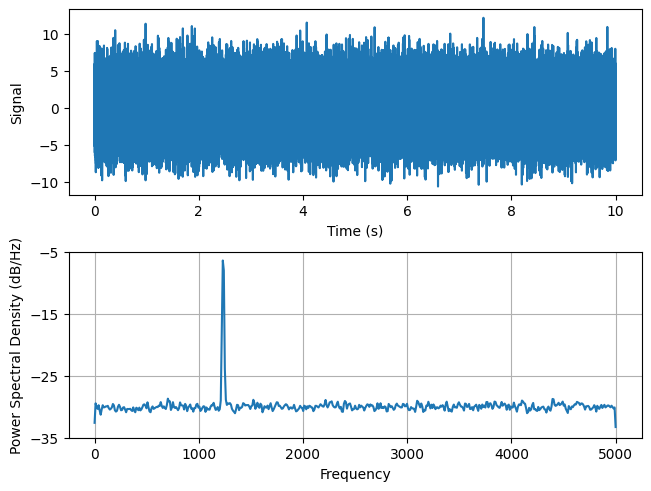

In [15]:
fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
ax0.plot(time, x)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Signal')
ax1.psd(x, 1024, FS)